## Step1 

In [1]:
# load the data

import os
import glob 
from matplotlib.pyplot import rc_context
import seaborn as sns
import numpy as np
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()

import pickle  #upper threshold 값들을 저장하고 불러오기 위해서. 



In [2]:
adata = sc.read_h5ad('./data/results/ov_35_merged.h5ad')


In [3]:
adata



AnnData object with n_obs × n_vars = 79855 × 10085
    obs: 'type', 'sample', 'batch'

In [4]:
adata.obs

,type,sample,batch
AAACCTGAGGTAAACT-0,CD45,CD45-1,0
AAACCTGCATCGATTG-0,CD45,CD45-1,0
AAACCTGGTATAATGG-0,CD45,CD45-1,0
AAACCTGGTCCATCCT-0,CD45,CD45-1,0
AAACCTGGTGTTCGAT-0,CD45,CD45-1,0
...,...,...,...
TTAGGACTCCGCATAA-35,CD45Stroma,CD45Stroma-13,35
TTCGAAGTCTGACCTC-35,CD45Stroma,CD45Stroma-13,35
TTCTACAGTAGGGTAC-35,CD45Stroma,CD45Stroma-13,35
TTGGCAACAGGCTCAC-35,CD45Stroma,CD45Stroma-13,35


In [5]:
type(adata.var_names)

pandas.core.indexes.base.Index

In [6]:
adata.var_names[0]

'MT-RNR1'

In [7]:
adata.var['mt'] = adata.var_names.str.startswith('MT-') 


In [8]:
adata.var

,mt
MT-RNR1,True
MT-TV,True
MT-RNR2,True
MT-ND1,True
MT-TM,True
...,...
7SK.1,False
VTRNA1-3,False
DOHH,False
U1.11,False


In [9]:
adata.var['ribo'] = adata.var_names.str.startswith(("RPS","RPL"))

In [10]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt','ribo'], percent_top=None, log1p=False, inplace=True)


In [11]:
adata


AnnData object with n_obs × n_vars = 79855 × 10085
    obs: 'type', 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [12]:
sc.settings.set_figure_params(dpi=100)


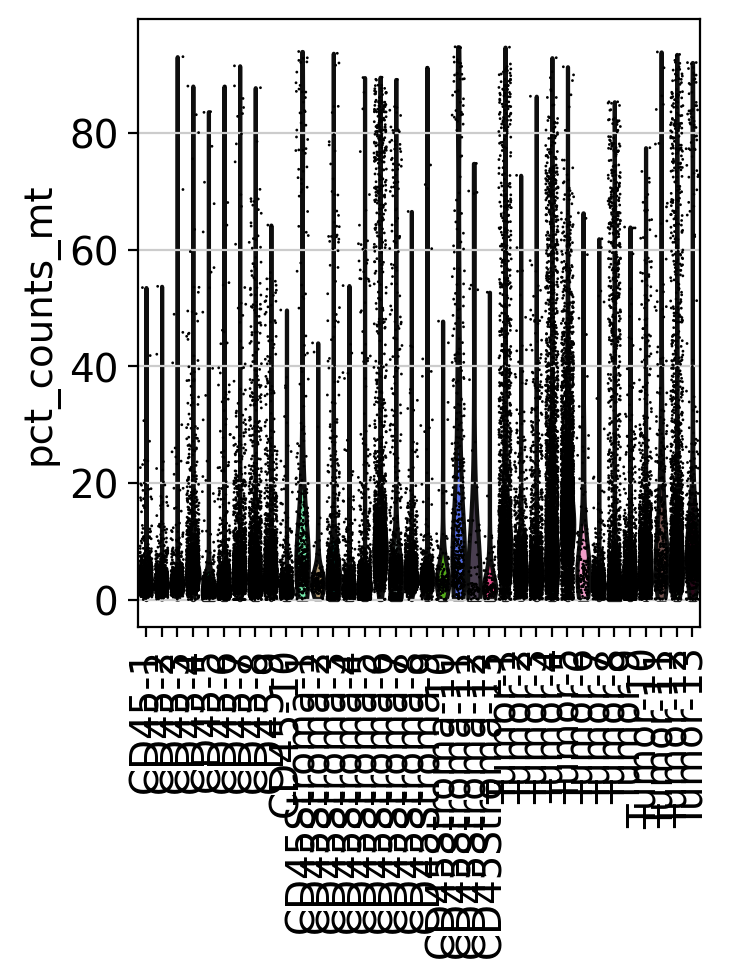

In [13]:
sc.settings.set_figure_params(dpi=100)

sc.pl.violin(adata, [ 'pct_counts_mt'],
             jitter=0.4, groupby = 'sample', rotation= 90)


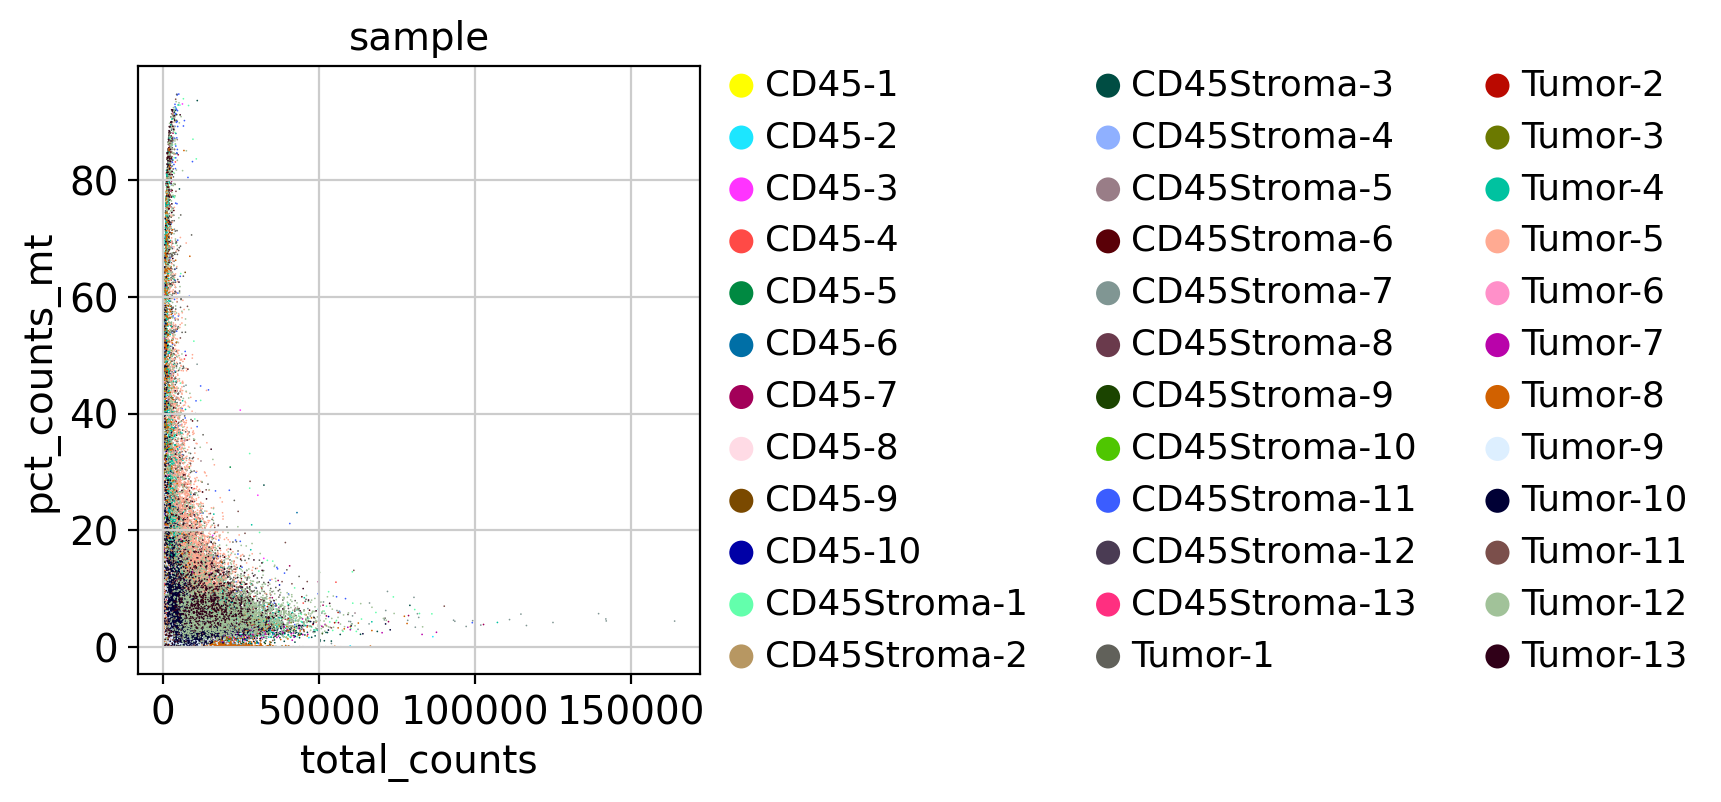

In [14]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt', color="sample")


In [15]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

print(adata.n_obs, adata.n_vars)

filtered out 278 cells that have less than 200 genes expressed
79577 10085


basic filtering 

normalizing counts per cell
    finished (0:00:01)


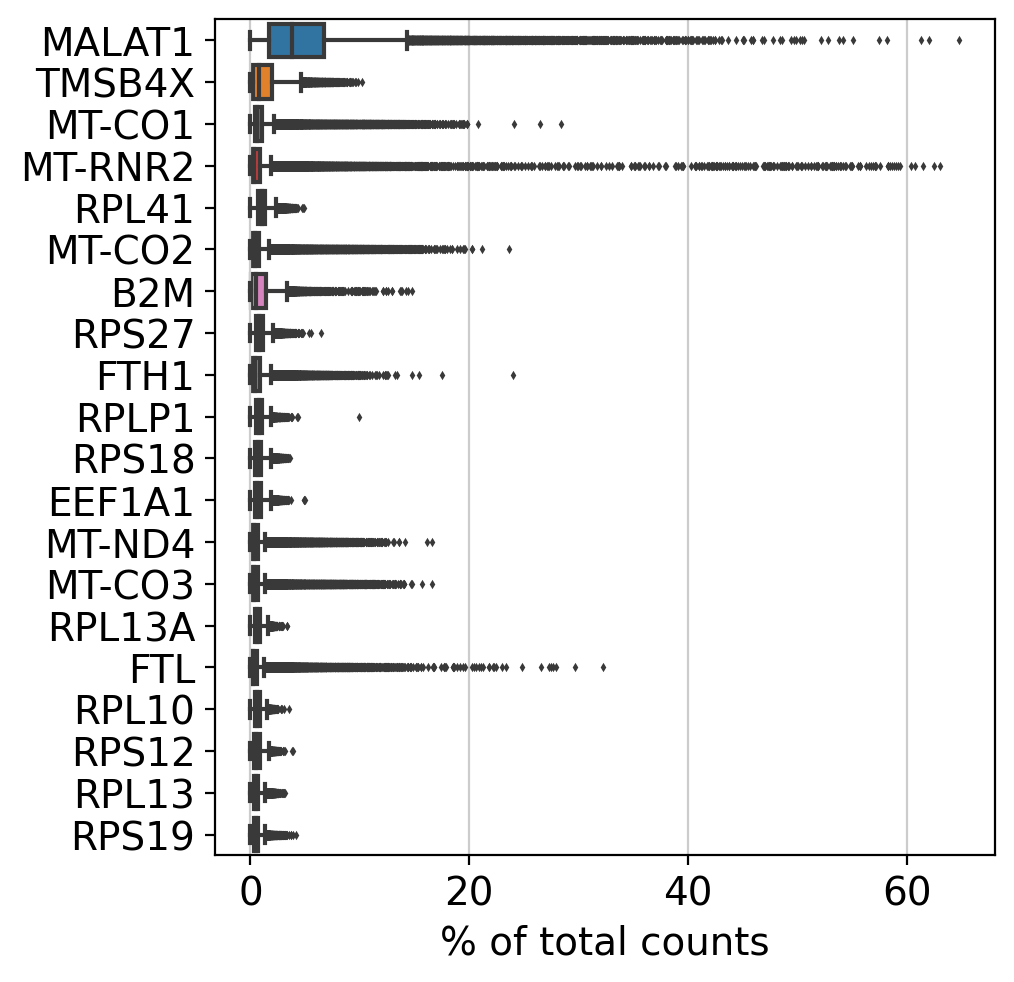

In [16]:
sc.pl.highest_expr_genes(adata, n_top=20)


In [17]:
# filter for percent mito


adata = adata[adata.obs['pct_counts_mt'] < 20, :]

# filter for percent ribo > 0.05
adata = adata[adata.obs['pct_counts_ribo'] > 5, :]

print("Remaining cells %d"%adata.n_obs)

Remaining cells 73554


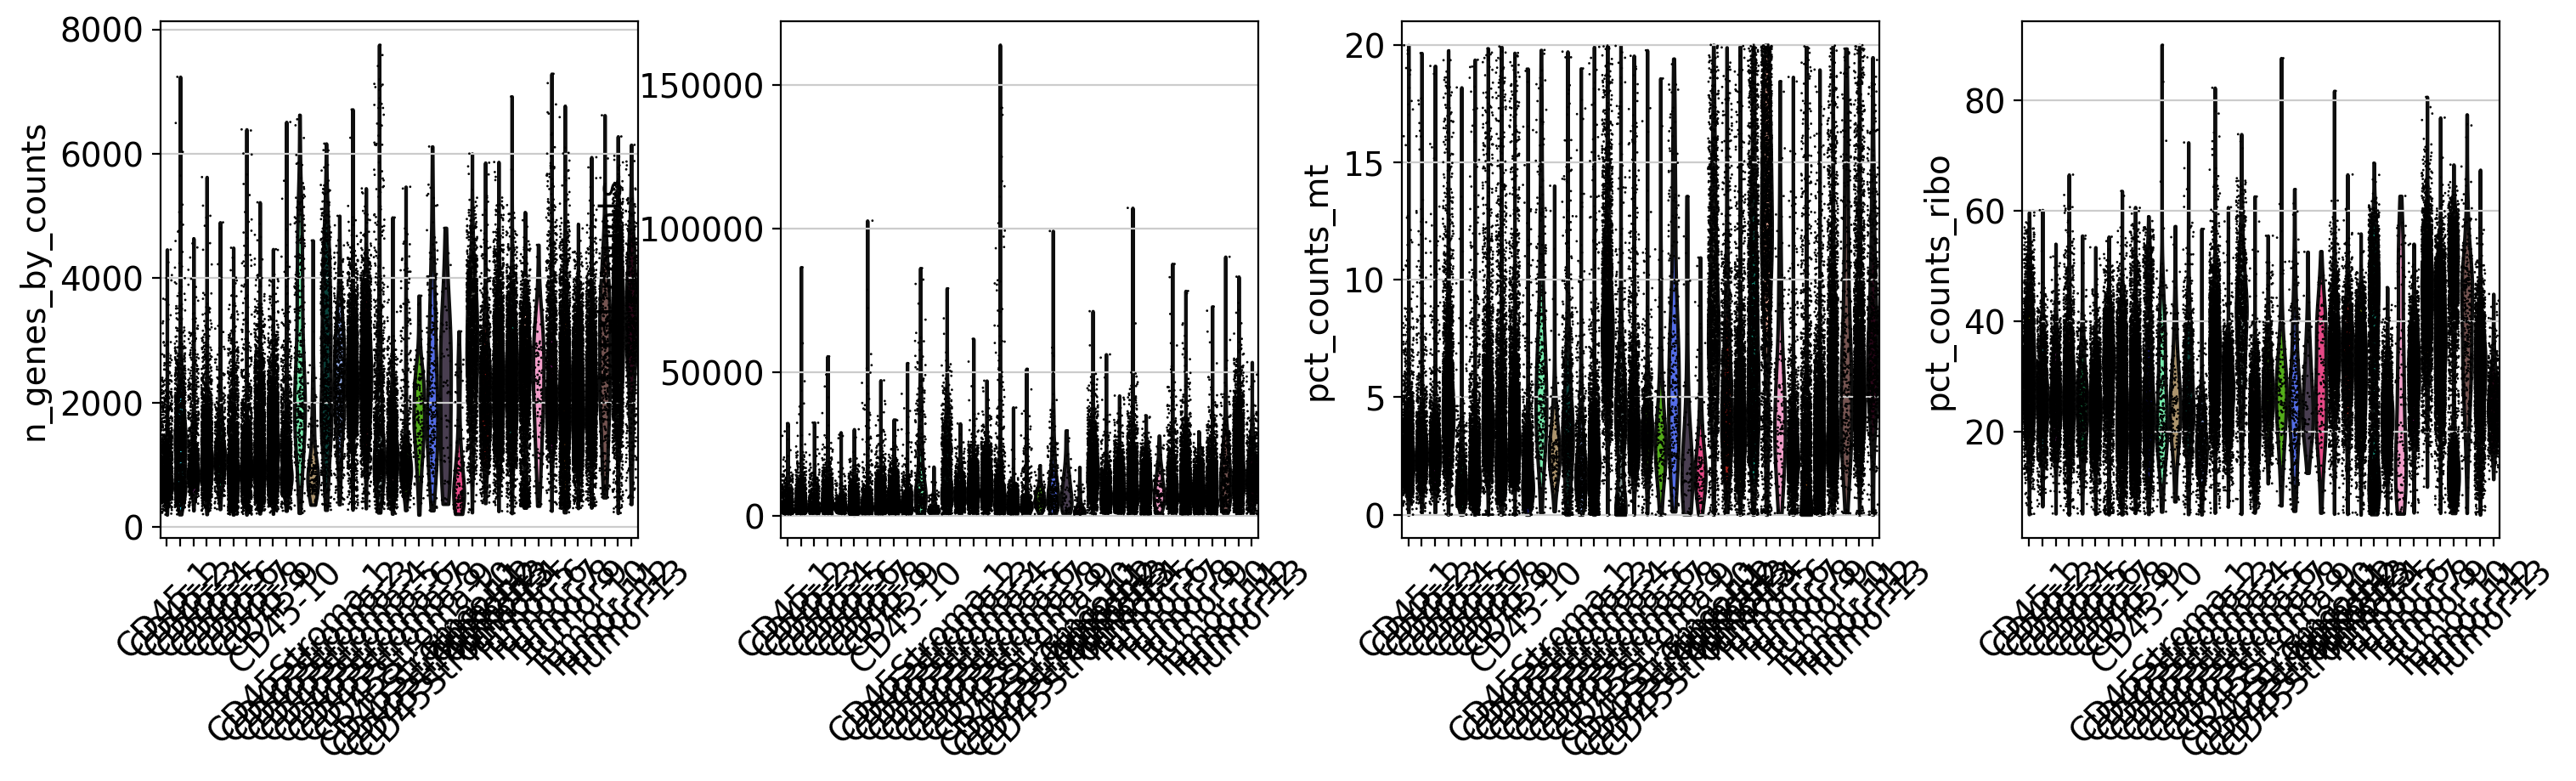

In [18]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt','pct_counts_ribo'],
             jitter=0.4, groupby = 'sample', rotation = 45)

Plot 을 원하는대로 볼 수 있는 plot 을 만들자. 

In [19]:
# save normalized counts in raw slot.
adata.raw = adata


Normalize 를 하기 전에 꼭 원본을 저장할 필요가 있다. 

In [20]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)



normalizing by total count per cell
    finished (0:00:05): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [ ]:
sc.pp.log1p(adata)


In [ ]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var.highly_variable]


In [ ]:
adata = adata[:, adata.var.highly_variable]
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

In [ ]:
sc.pl.umap(adata, color=['type'])


In [ ]:
sc.pl.umap(adata, color=['sample'])


Preprocessing 을 조금 더 제대로 하니 그래프 모습이 달라 보인다. 

In [ ]:
adata

In [21]:
# also revert back to the raw counts as the main matrix in adata
adata = adata.raw.to_adata() 



In [22]:
save_file = 'data/results/11132021_ov_scRNA_step1.h5ad'
adata.write_h5ad(save_file)

In [ ]:
adata.X.shape

In [ ]:
(np.mean(adata.X, axis=0))

## step 2

In [1]:
# load the data

import os
import glob 
from matplotlib.pyplot import rc_context
import seaborn as sns
import numpy as np
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()

import pickle  #upper threshold 값들을 저장하고 불러오기 위해서. 


In [2]:
adata = sc.read_h5ad('data/results/11132021_ov_scRNA_step1.h5ad')


In [3]:
adata


AnnData object with n_obs × n_vars = 73554 × 10085
    obs: 'type', 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'n_counts'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'sample_colors'

In [4]:
np.mean(adata.X)

0.79623175

In [5]:

# normalize to depth 10 000
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)



normalizing by total count per cell
    finished (0:00:02): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [6]:
np.mean(adata.X)

0.9915741

In [7]:
# logaritmize
sc.pp.log1p(adata)

In [8]:
np.mean(adata.X)

0.23176512

In [9]:
# store normalized counts in the raw slot, 
# we will subset adata.X for variable genes, but want to keep all genes matrix as well.
adata.raw = adata

Normalize가 되었고 log transformation 이 진행되었다. 

In [10]:
# compute variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
print("Highly variable genes: %d"%sum(adata.var.highly_variable))


extracting highly variable genes
    finished (0:00:09)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
Highly variable genes: 2093


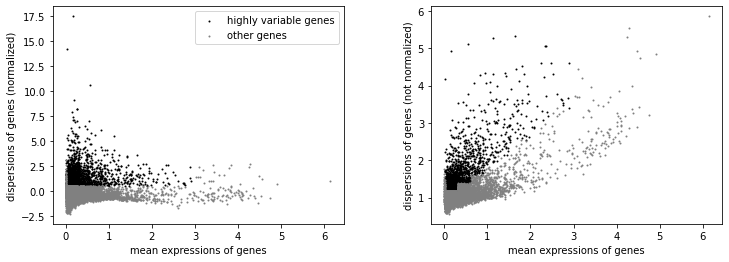

In [11]:
#plot variable genes
sc.pl.highly_variable_genes(adata)



In [12]:
adata

AnnData object with n_obs × n_vars = 73554 × 10085
    obs: 'type', 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'n_counts'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'sample_colors', 'log1p', 'hvg'

In [13]:
# subset for variable genes in the dataset
adata = adata[:, adata.var['highly_variable']]

In [14]:
adata

View of AnnData object with n_obs × n_vars = 73554 × 2093
    obs: 'type', 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'n_counts'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'sample_colors', 'log1p', 'hvg'

In [ ]:
많이 표현된 gene 들은 high variation 에 영향을 미치기 쉽다.

In [16]:
# regress out unwanted variables
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    finished (0:02:21)


In [ ]:
#this task takes longer.  Actually very long time.  

In [17]:
# scale data, clip values exceeding standard deviation 10.
sc.pp.scale(adata, max_value=10)

In [18]:
sc.tl.pca(adata, svd_solver='arpack')


computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:08)


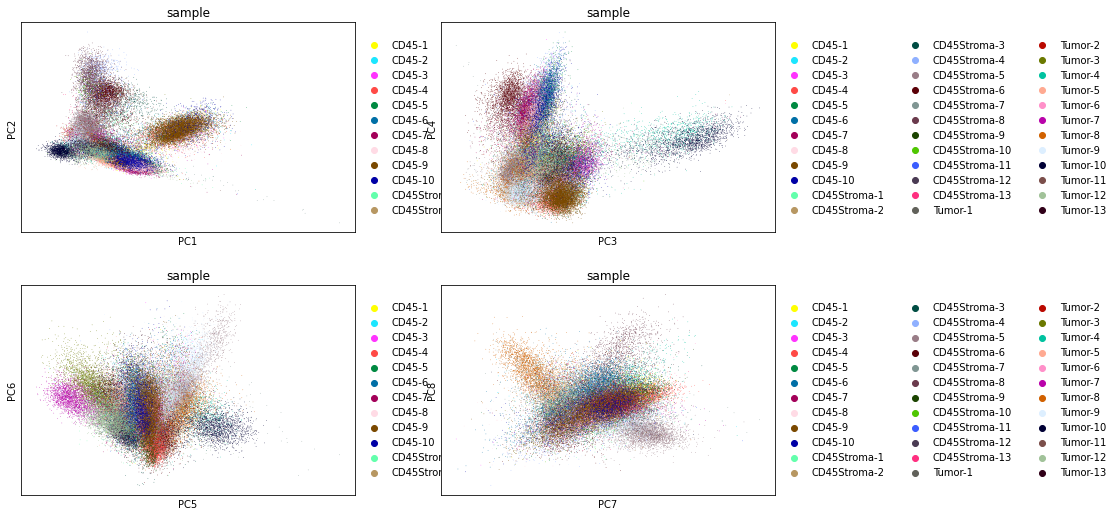

In [19]:
# plot more PCS

sc.pl.pca(adata, color='sample', components = ['1,2','3,4','5,6','7,8'], ncols=2)

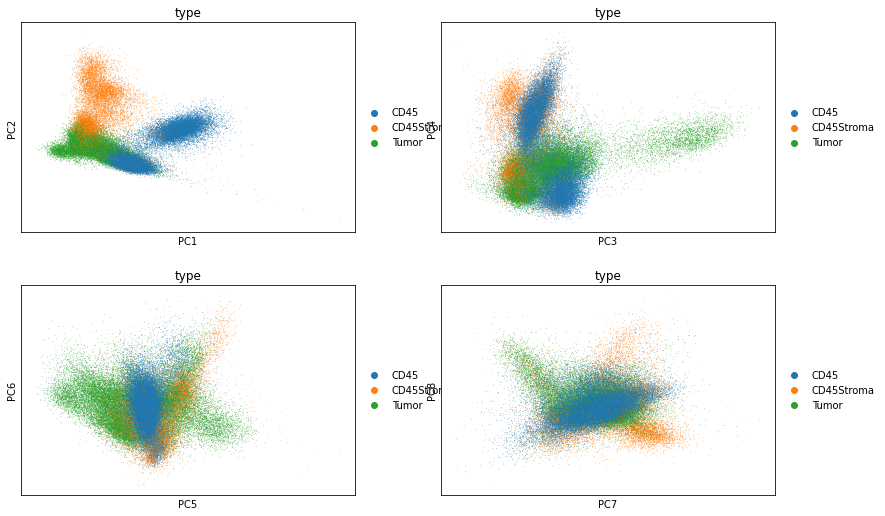

In [20]:
# plot more PCS

sc.pl.pca(adata, color='type', components = ['1,2','3,4','5,6','7,8'], ncols=2)

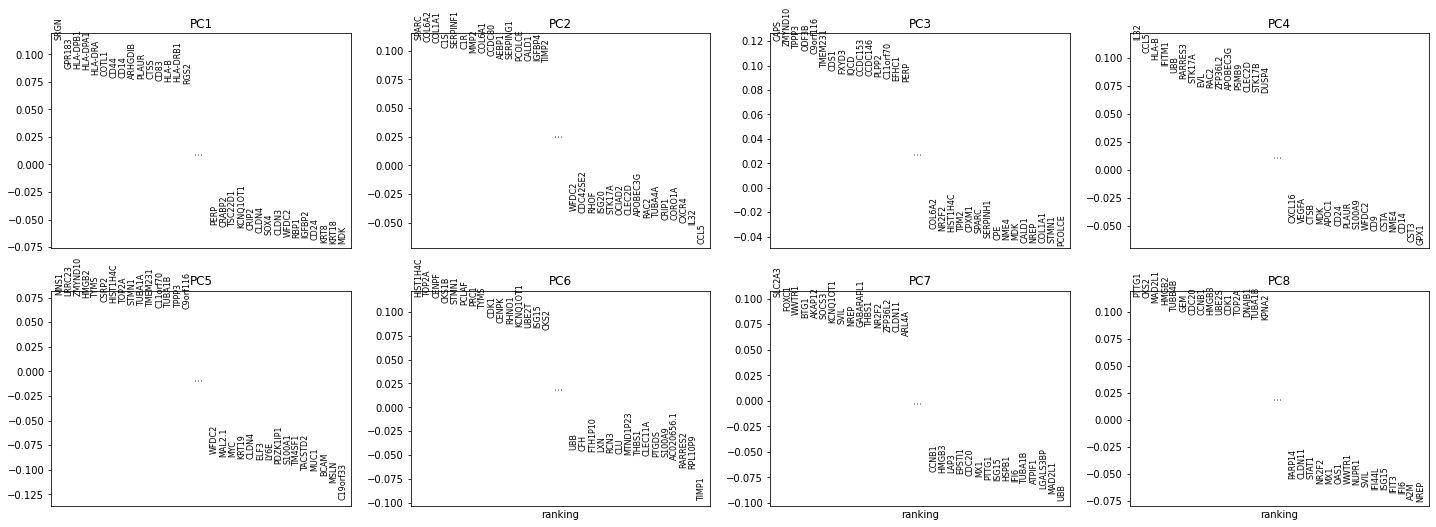

In [21]:
#Plot loadings
sc.pl.pca_loadings(adata, components=[1,2,3,4,5,6,7,8])

# OBS! only plots the positive axes genes from each PC!!

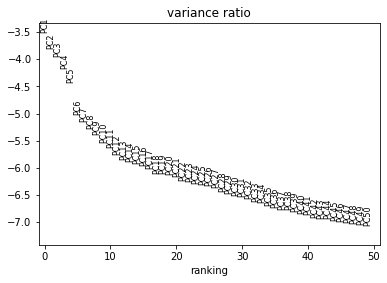

In [22]:
sc.pl.pca_variance_ratio(adata, log=True, n_pcs = 50)


### tSNE 

In [23]:
sc.tl.tsne(adata, n_pcs = 30)


computing tSNE
    using 'X_pca' with n_pcs = 30
    using sklearn.manifold.TSNE


/home/ubuntu/pyenv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:05:25)


tSNE 는 5분 걸린다. 

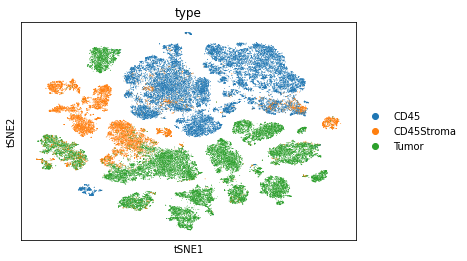

In [24]:
sc.pl.tsne(adata, color='type')


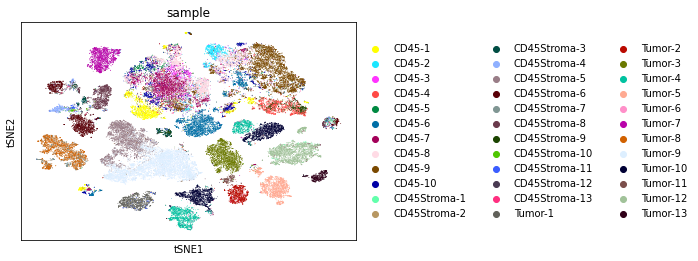

In [25]:
sc.pl.tsne(adata, color='sample')


The UMAP implementation in SCANPY uses a neighborhood graph as the distance matrix, so we need to first calculate the graph.



In [26]:
sc.pp.neighbors(adata, n_pcs = 30, n_neighbors = 20)


computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:15)


In [27]:
sc.tl.umap(adata)


computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:59)


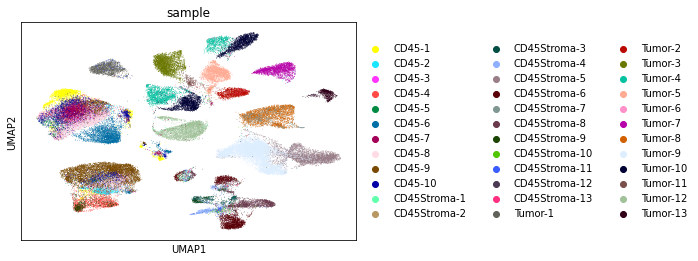

In [28]:
sc.pl.umap(adata, color='sample')


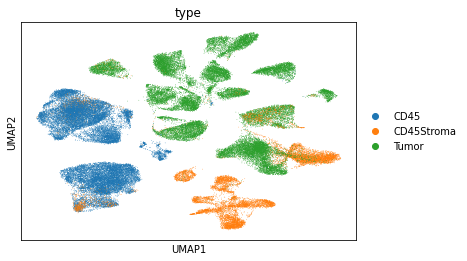

In [29]:
sc.pl.umap(adata, color='type')


In [30]:
adata.write_h5ad('./data/results/11132021_ov_scRNA_step2.h5ad')
